# K Means (Top bottom approach)
- k  = no of cluster
- mean = centroid

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.rename(columns= {'Genre': 'Gender'}, inplace= True)

In [5]:
# We have only required only 2 columns 

In [6]:
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


C:\Users\sunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

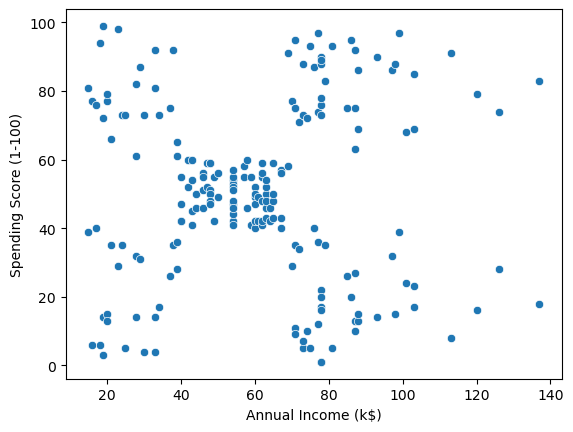

In [7]:
sns.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'])

- By looking at the graph ... there are 5 clusters
- But we are not rely on this.. we use Elbow method to find clusters

In [8]:
x.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
x.duplicated().sum()

4

In [10]:
x[x.duplicated(keep= False)]

,Annual Income (k$),Spending Score (1-100)
48,40,42
49,40,42
65,48,59
68,48,59
129,71,75
131,71,75
156,78,1
158,78,1


In [11]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
x.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [14]:
x = pd.DataFrame(sc.fit_transform(x), columns= x.columns)

In [15]:
x

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [16]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans()

cluster = km.fit_predict(x)

In [18]:
cluster

array([3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 6, 3, 5, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 2, 5, 5, 2, 2, 5, 2, 5, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 4, 0, 4, 0,
       2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7,
       1, 7])

#  Elbow Method

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# WCSS = Within Centroid Sum of Square

wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [21]:
wcss

# After 5th point the difference is very less

[399.99999999999994,
 269.29934286898697,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 44.91118554999014,
 37.18292537017848,
 32.38347828578983,
 29.061152995353442,
 25.877054604412425,
 23.37409986508554,
 21.266467690627426,
 19.500190829847227,
 17.919438899981085,
 16.129031888941622,
 15.11962672992433,
 13.809807761193817,
 12.882667914227703]

Text(0, 0.5, 'WCSS')

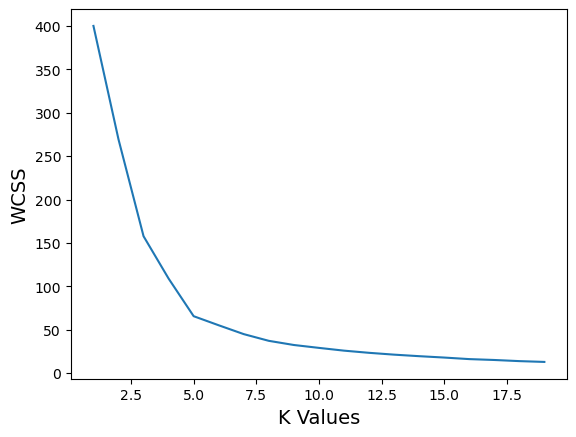

In [22]:
plt.plot(range(1,20), wcss)
plt.xlabel('K Values', fontsize = 14)
plt.ylabel('WCSS', fontsize = 14)

- By looking at the graph the optimal no of cluster is 5

In [23]:
km = KMeans(n_clusters=5)
ylabel = km.fit_predict(x)

In [24]:
ylabel

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [25]:
# Centroids

km.cluster_centers_

array([[-0.20091257, -0.02645617],
       [-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907]])

In [26]:
x['Cluster'] = ylabel

In [27]:
x

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,1
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,1
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,1
...,...,...,...
195,2.268791,1.118061,2
196,2.497807,-0.861839,4
197,2.497807,0.923953,2
198,2.917671,-1.250054,4


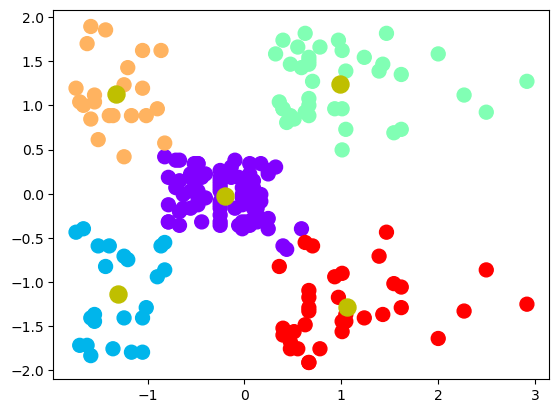

In [48]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], s =100, cmap = 'rainbow', c = x['Cluster'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s =150, color = 'y')

In [29]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [30]:
df.drop(columns=['CustomerID'], inplace= True)

In [31]:
df['Cluster'] = ylabel

In [32]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,4
197,Male,32,126,74,2
198,Male,32,137,18,4


In [33]:
df.groupby('Cluster').agg('mean')

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,45.217391,26.304348,20.913043
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


###  Now start Supervise Learning

- We use logistic learning

In [34]:
x.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,1
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,1
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,1


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [41]:
x1= x.iloc[:,:2]
y = x.iloc[:,-1]

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split (x1,y , test_size= 0.2, random_state= 1)

In [43]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00         5
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         9

    accuracy                           0.93        40
   macro avg       0.96      0.91      0.93        40
weighted avg       0.94      0.93      0.92        40

